# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv('inventory_management_e_grocery_dataset.csv')
df

,SKU_ID,SKU_Name,Category,ABC_Class,Supplier_ID,Supplier_Name,Warehouse_ID,Warehouse_Location,Batch_ID,Received_Date,...,SKU_Churn_Rate,Order_Frequency_per_month,Supplier_OnTime_Pct,FIFO_FEFO,Inventory_Status,Count_Variance,Audit_Date,Audit_Variance_Pct,Demand_Forecast_Accuracy_Pct,Notes
0,SKU0001,Pantry Product 13,Pantry,A,S005,PT Agro Raya,WHBDG,Bandung - Rancaekek,BATCH2679,2025-07-14,...,"2,39","5,00","70,68%",FIFO,In Stock,0,2025-06-26,"-7,14%","95,67%",NaN
1,SKU0002,Fresh Product 112,Fresh Produce,C,S004,PT Nusantara Supplier,WHDPS,Denpasar - Tabanan,BATCH4257,2025-04-08,...,"3,34","12,00","84,61%",FEFO,Low Stock,4,2025-08-12,"2,15%","86,00%",NaN
2,SKU0003,Meat Product 446,Meat,B,S001,PT Segar Makmur,WHBDG,Bandung - Rancaekek,BATCH6574,2025-03-15,...,"2,26","11,00","85,36%",FIFO,Expiring Soon,-5,2025-08-13,"6,85%","87,64%",NaN
3,SKU0004,Seafood Product 48,Seafood,A,S007,PT Bakerindo,WHJKT,Jakarta - Cengkareng,BATCH5333,2025-06-10,...,"2,72","10,00","72,81%",FIFO,Expiring Soon,0,2025-07-13,"-6,69%","71,15%",NaN
4,SKU0005,Personal Product 194,Personal Care,A,S002,PT Indo Fresh,WHDPS,Denpasar - Tabanan,BATCH6925,2025-06-26,...,"2,18","2,00","70,93%",FIFO,In Stock,-5,2025-06-11,"1,23%","76,25%",High return rate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SKU0996,Fresh Product 377,Fresh Produce,C,S006,PT Frozen Express,WHJKT,Jakarta - Cengkareng,BATCH8871,2025-07-20,...,"2,51","8,00","79,06%",FEFO,Low Stock,2,2025-08-20,"-6,23%","80,85%",NaN
996,SKU0997,Frozen Product 125,Frozen,C,S001,PT Segar Makmur,WHDPS,Denpasar - Tabanan,BATCH9906,2025-03-16,...,"5,77","15,00","74,40%",FIFO,Low Stock,0,2025-09-04,"1,33%","88,43%",Promotional item
997,SKU0998,Fresh Product 454,Fresh Produce,C,S007,PT Bakerindo,WHBDG,Bandung - Rancaekek,BATCH1393,2025-09-09,...,"2,97","9,00","92,17%",FEFO,Low Stock,0,2025-07-22,"5,47%","91,92%",Promotional item
998,SKU0999,Meat Product 451,Meat,C,S007,PT Bakerindo,WHJKT,Jakarta - Cengkareng,BATCH2804,2025-05-07,...,"21,35","13,00","92,40%",FIFO,Low Stock,0,2025-08-04,"0,46%","93,18%",NaN


### Explore The Dataset

In [3]:
df.shape

(1000, 37)

In [4]:
df.describe()

,Stock_Age_Days,Quantity_On_Hand,Quantity_Reserved,Quantity_Committed,Damaged_Qty,Returns_Qty,Forecast_Next_30d,Reorder_Point,Safety_Stock,Lead_Time_Days,Count_Variance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,91.541000,231.563000,50.302000,38.742000,1.168000,0.8120,332.218940,152.797633,58.473000,4.030000,0.199000
std,52.475308,201.988781,50.106162,42.765761,1.295938,0.9206,301.358418,163.056230,66.051556,2.983622,2.708641
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,1.000000,1.001000,2.000000,1.000000,-7.000000
25%,46.000000,81.000000,15.000000,10.000000,0.000000,0.0000,2.577250,46.000000,19.000000,2.000000,-1.000000
50%,95.000000,180.000000,35.000000,24.000000,1.000000,1.0000,288.000000,98.000000,36.500000,3.000000,0.000000
75%,138.000000,320.000000,68.000000,53.000000,2.000000,1.0000,572.500000,196.000000,70.250000,5.000000,2.000000
max,180.000000,977.000000,363.000000,310.000000,7.000000,4.0000,994.000000,954.000000,624.000000,14.000000,9.000000


In [5]:
df.nunique()

SKU_ID                          1000
SKU_Name                         900
Category                          10
ABC_Class                          3
Supplier_ID                       10
Supplier_Name                     10
Warehouse_ID                       5
Warehouse_Location                 5
Batch_ID                         923
Received_Date                    179
Last_Purchase_Date               221
Expiry_Date                      646
Stock_Age_Days                   179
Quantity_On_Hand                 472
Quantity_Reserved                182
Quantity_Committed               152
Damaged_Qty                        8
Returns_Qty                        5
Avg_Daily_Sales                  912
Forecast_Next_30d                774
Days_of_Inventory                698
Reorder_Point                    374
Safety_Stock                     198
Lead_Time_Days                     8
Unit_Cost_USD                    700
Last_Purchase_Price_USD          710
Total_Inventory_Value_USD        996
S

## Exploratory Data Analysis

### Dates

In [6]:
df['Received_Date'] = pd.to_datetime(df['Received_Date'], errors='coerce')

In [7]:
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'], errors='coerce')

In [8]:
df['Expiry_Date'] = pd.to_datetime(df['Expiry_Date'], errors='coerce')

In [9]:
df['Audit_Date'] = pd.to_datetime(df['Audit_Date'], errors='coerce')

### Clean The Data

In [10]:
df.isna().sum()

SKU_ID                            0
SKU_Name                          0
Category                          0
ABC_Class                         0
Supplier_ID                       0
Supplier_Name                     0
Warehouse_ID                      0
Warehouse_Location                0
Batch_ID                          0
Received_Date                     0
Last_Purchase_Date                0
Expiry_Date                       0
Stock_Age_Days                    0
Quantity_On_Hand                  0
Quantity_Reserved                 0
Quantity_Committed                0
Damaged_Qty                       0
Returns_Qty                       0
Avg_Daily_Sales                   0
Forecast_Next_30d                 0
Days_of_Inventory                 0
Reorder_Point                     0
Safety_Stock                      0
Lead_Time_Days                    0
Unit_Cost_USD                     0
Last_Purchase_Price_USD           0
Total_Inventory_Value_USD         0
SKU_Churn_Rate              

In [11]:
df.duplicated().sum()

0

In [12]:
df.fillna(0, inplace=True)

### Data Types

#### 1. Avg Daily Sales

In [13]:
df['Avg_Daily_Sales']

0      28,57
1      34,99
2      36,55
3      25,49
4      17,05
       ...  
995    31,90
996    40,03
997    26,13
998    23,48
999    11,88
Name: Avg_Daily_Sales, Length: 1000, dtype: object

In [14]:
df['Avg_Daily_Sales'] = df['Avg_Daily_Sales'].str.replace(',','.').astype(float)

#### 2. Days Of Inventory

In [15]:
df['Days_of_Inventory']

0      12,57
1       8,97
2      13,27
3      11,02
4      13,78
       ...  
995    11,97
996     5,20
997    10,10
998     1,41
999     8,59
Name: Days_of_Inventory, Length: 1000, dtype: object

In [16]:
df['Days_of_Inventory'] = df['Days_of_Inventory'].str.replace(',','.').astype(float)

#### 3. SKU Churn Rate

In [17]:
df['SKU_Churn_Rate']

0       2,39
1       3,34
2       2,26
3       2,72
4       2,18
       ...  
995     2,51
996     5,77
997     2,97
998    21,35
999     3,49
Name: SKU_Churn_Rate, Length: 1000, dtype: object

In [18]:
df['SKU_Churn_Rate'] = df['SKU_Churn_Rate'].str.replace(',','.').astype(float)

#### 4. Order Frequency Per Month

In [19]:
df['Order_Frequency_per_month']

0       5,00
1      12,00
2      11,00
3      10,00
4       2,00
       ...  
995     8,00
996    15,00
997     9,00
998    13,00
999    11,00
Name: Order_Frequency_per_month, Length: 1000, dtype: object

In [20]:
df['Order_Frequency_per_month'] = df['Order_Frequency_per_month'].str.replace(',','.').astype(float)

#### 5.  Unit Cost USD

In [21]:
df['Unit_Cost_USD'] = df['Unit_Cost_USD'].str.replace('$', '', regex=False)

In [22]:
df['Unit_Cost_USD'] = df['Unit_Cost_USD'].str.replace(',','.').astype(float)

In [23]:
df['Unit_Cost_USD']

0       5.81
1       1.45
2       1.86
3      14.50
4       9.46
       ...  
995     0.99
996     2.54
997     0.69
998     2.38
999    10.98
Name: Unit_Cost_USD, Length: 1000, dtype: float64

#### 6.  Last Purchase Price USD

In [24]:
df['Last_Purchase_Price_USD'] = df['Last_Purchase_Price_USD'].str.replace('$', '', regex=False)

In [25]:
df['Last_Purchase_Price_USD'] = df['Last_Purchase_Price_USD'].str.replace(',','.').astype(float)

In [26]:
df['Last_Purchase_Price_USD']

0       5.71
1       1.33
2       1.69
3      14.12
4      10.31
       ...  
995     1.05
996     2.31
997     0.71
998     2.71
999    10.08
Name: Last_Purchase_Price_USD, Length: 1000, dtype: float64

#### 7.  Total Inventory Value USD

In [27]:
df['Total_Inventory_Value_USD'] = df['Total_Inventory_Value_USD'].str.replace('$', '', regex=False)

In [30]:
df['Total_Inventory_Value_USD']

0      2.084,25
1        456,71
2        902,63
3      4.073,15
4      2.222,91
         ...   
995      379,21
996      527,28
997      181,39
998       78,48
999    1.120,29
Name: Total_Inventory_Value_USD, Length: 1000, dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   SKU_ID                        1000 non-null   object        
 1   SKU_Name                      1000 non-null   object        
 2   Category                      1000 non-null   object        
 3   ABC_Class                     1000 non-null   object        
 4   Supplier_ID                   1000 non-null   object        
 5   Supplier_Name                 1000 non-null   object        
 6   Warehouse_ID                  1000 non-null   object        
 7   Warehouse_Location            1000 non-null   object        
 8   Batch_ID                      1000 non-null   object        
 9   Received_Date                 1000 non-null   datetime64[ns]
 10  Last_Purchase_Date            1000 non-null   datetime64[ns]
 11  Expiry_Date                   1

In [32]:
num_cols = ['Stock_Age_Days', 'Quantity_On_Hand', 'Quantity_Reserved', 'Quantity_Committed', 'Damaged_Qty', 'Returns_Qty','Avg_Daily_Sales', 'Forecast_Next_30d', 'Days_of_Inventory', 'Safety_Stock', 'Lead_Time_Days', 'Unit_Cost_USD', 
            'Last_Purchase_Price_USD', 'SKU_Churn_Rate', 'Order_Frequency_per_month', 'Count_Variance']

cat_cols = ['Category', 'ABC_Class', 'Supplier_Name', 'Warehouse_Location', 'FIFO_FEFO', 'Inventory_Status', 'Notes']

print(len(num_cols))
print(len(cat_cols))

16
7


In [33]:
colors = ['#27708C', '#539DA6', '#75BFB8', '#F2F2F2', '#89D9CA', '#357C8C', '#175973', '#152623']

## Visualization

### 1. Histogram Of Num_Cols

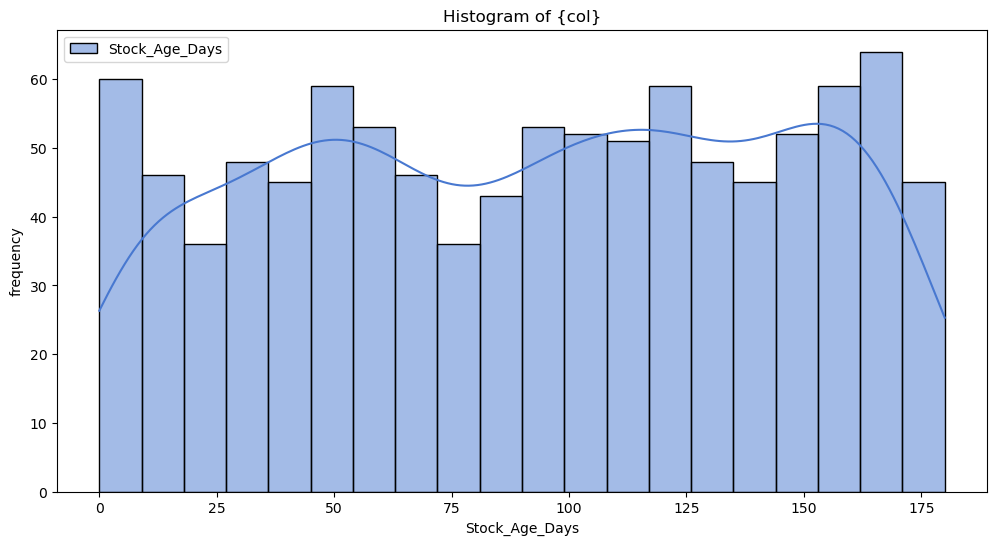

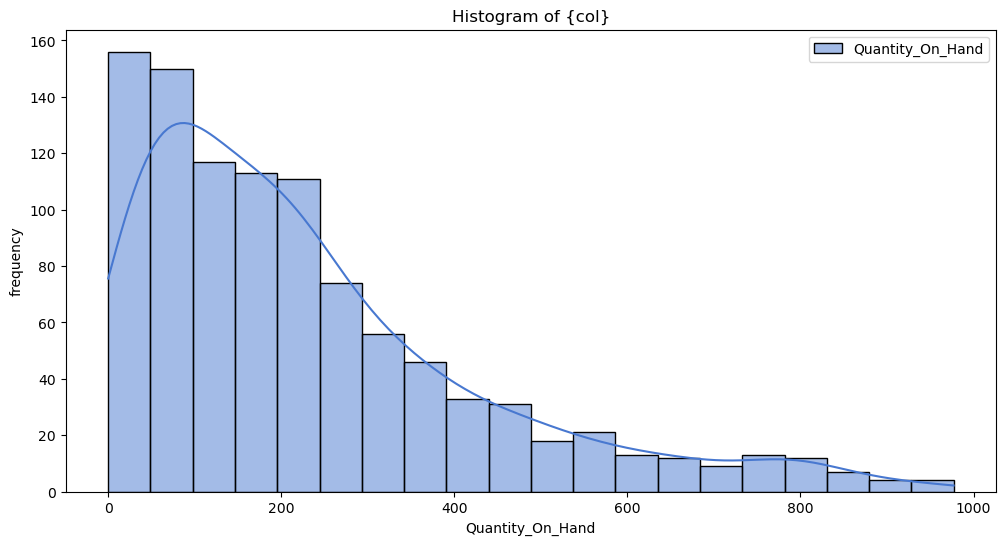

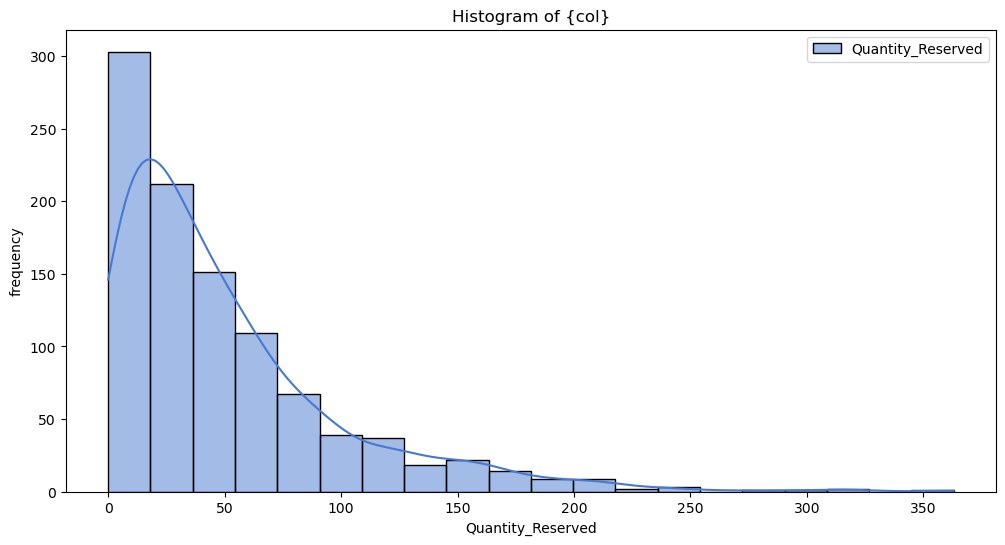

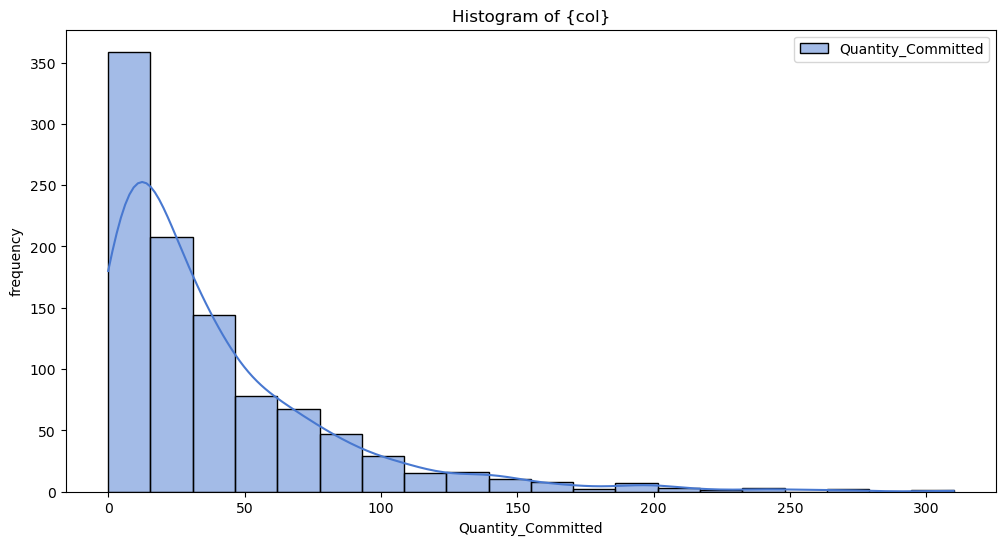

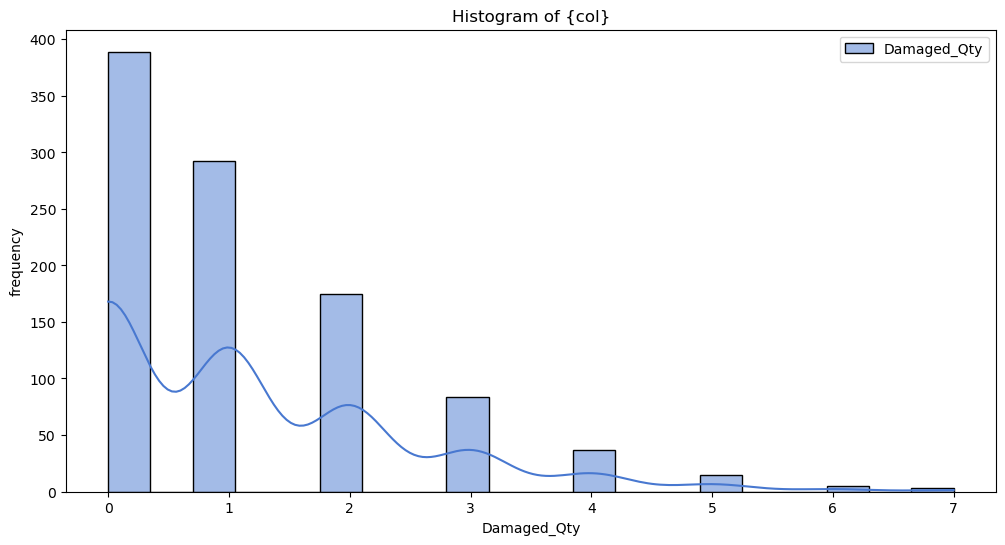

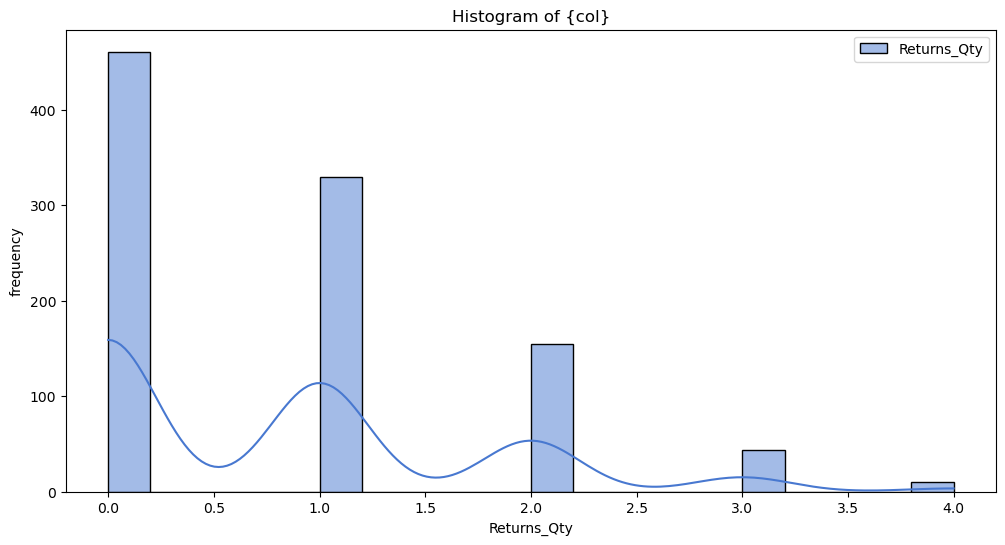

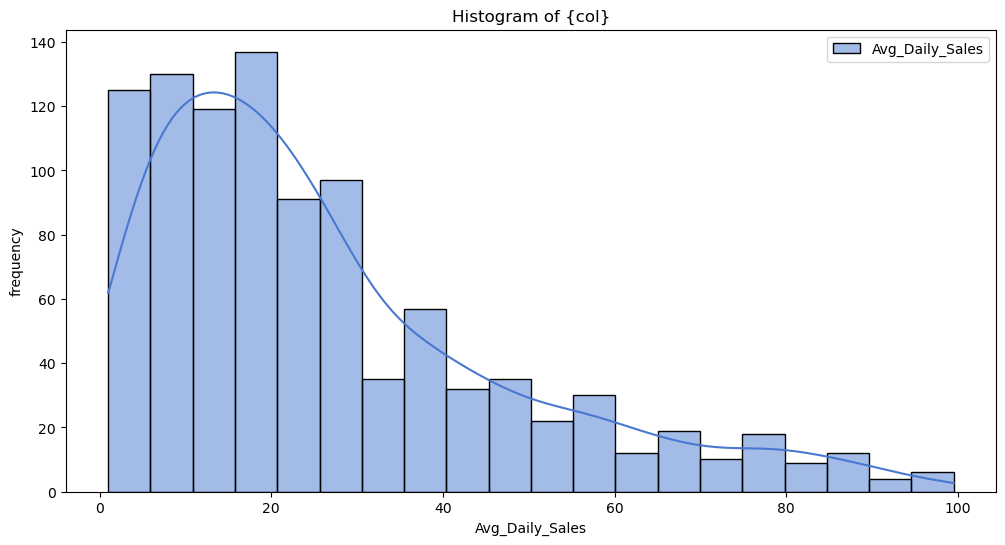

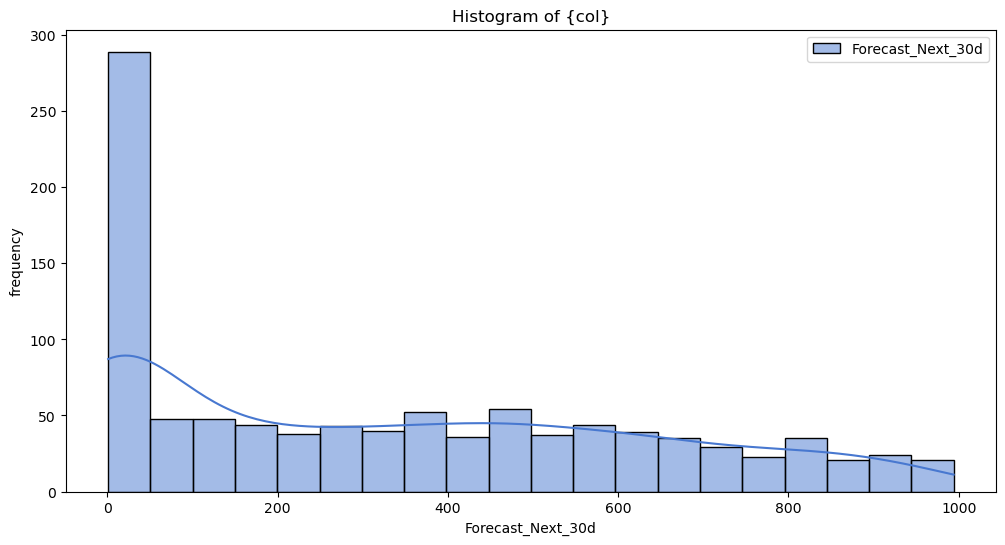

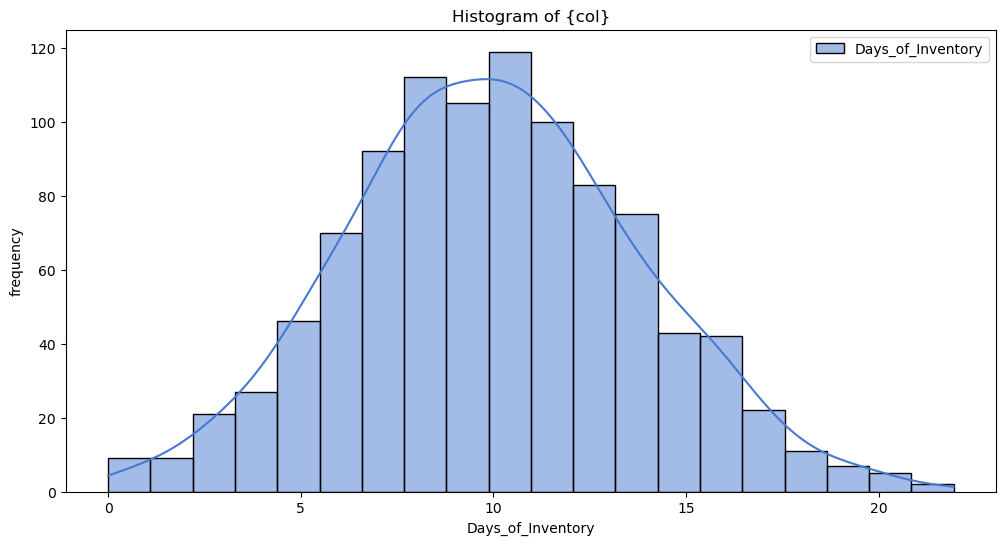

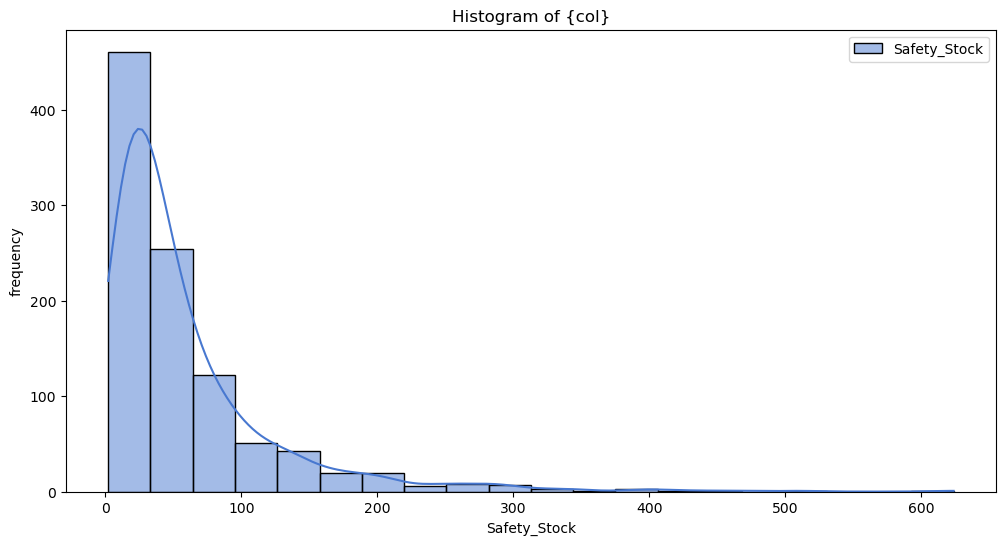

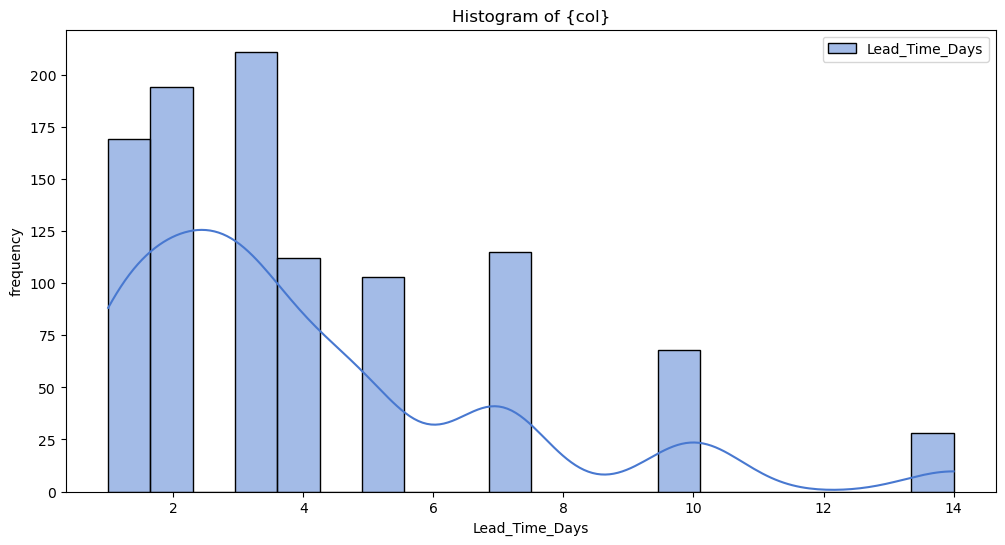

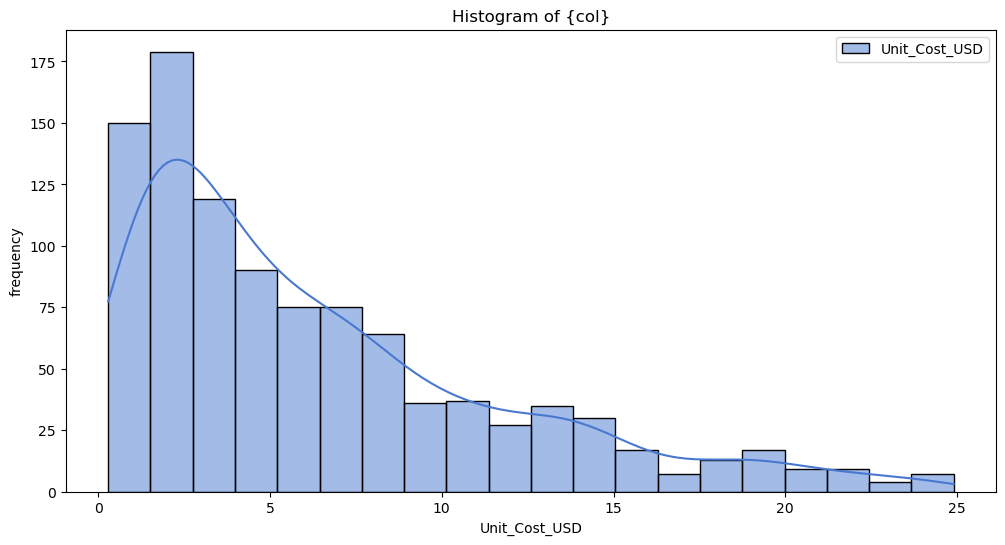

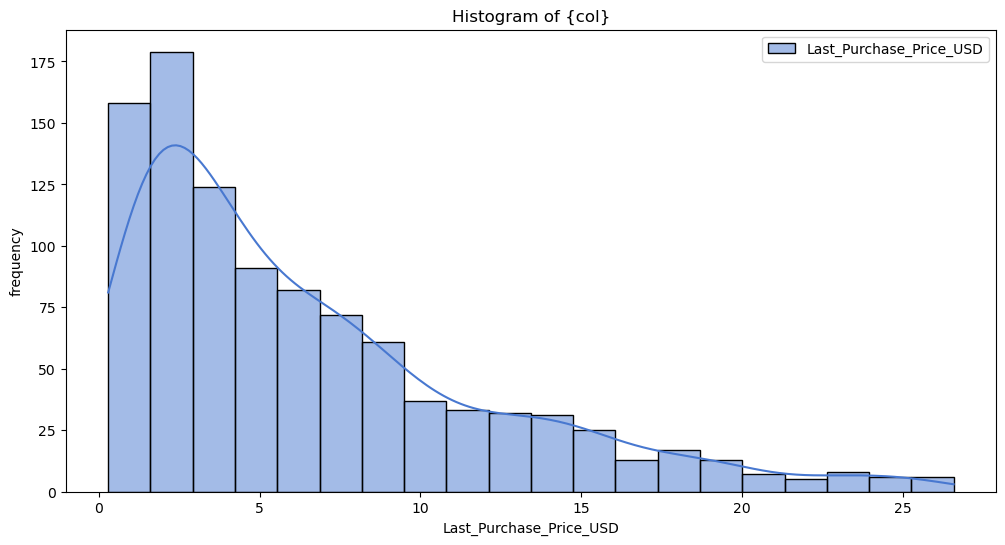

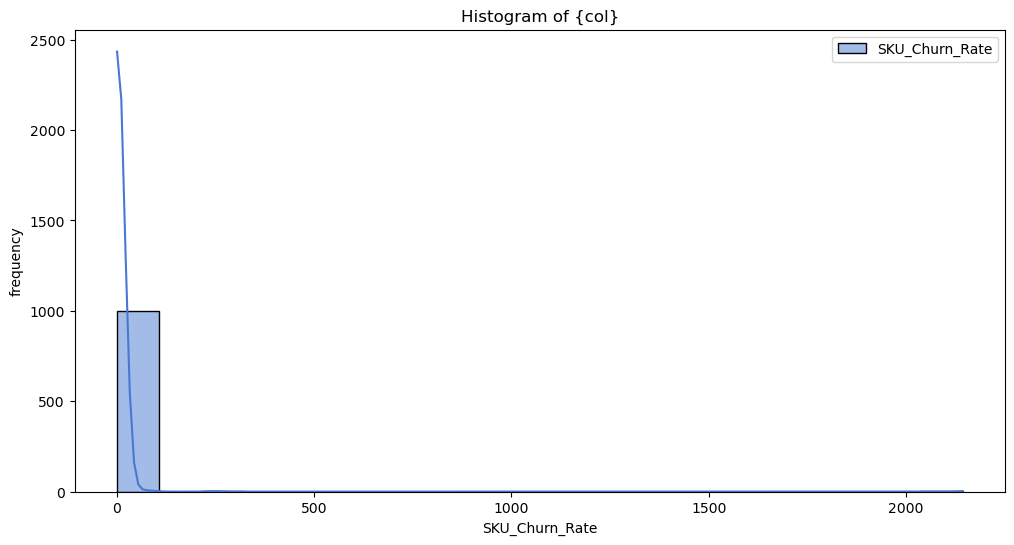

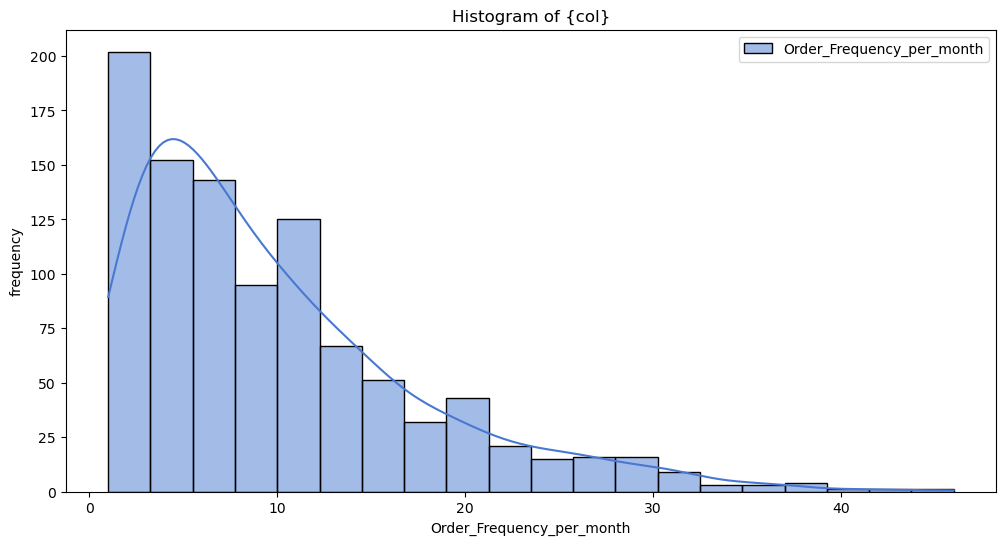

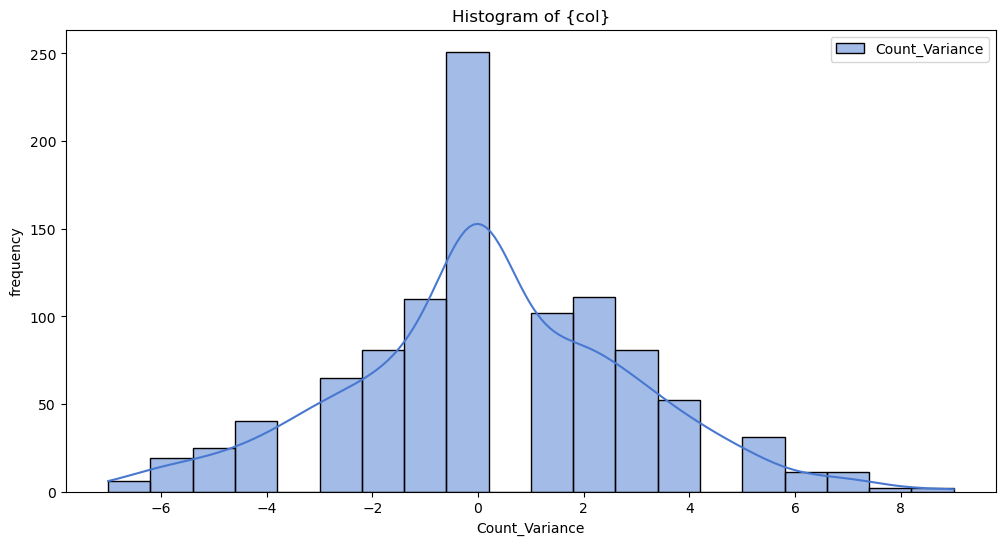

In [35]:
for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[[col]], kde=True, palette='muted', bins=20)
    plt.title('Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.tight_layout
    plt.show()

### 2. Countplot Of Cat_Cols

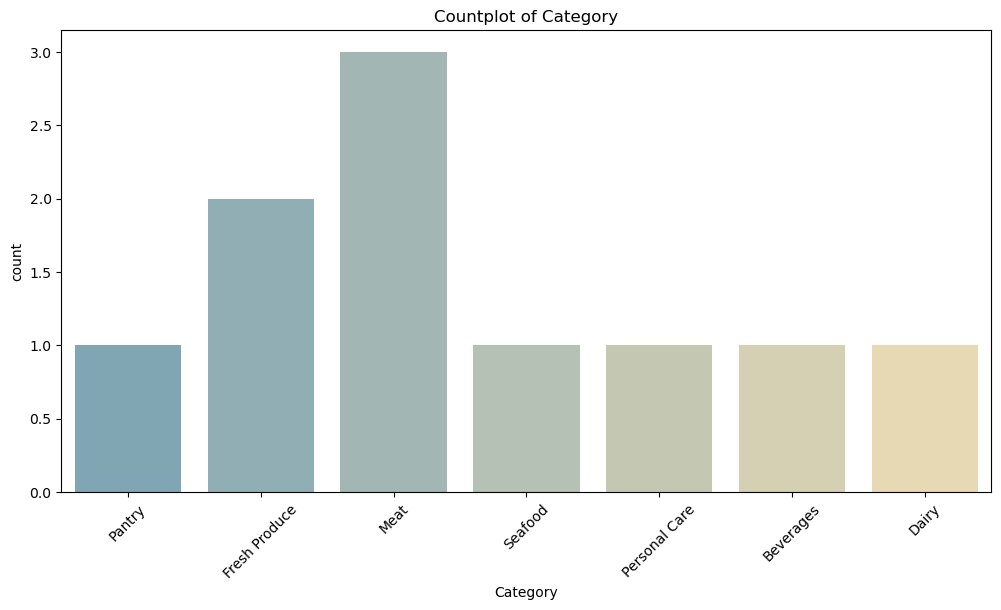

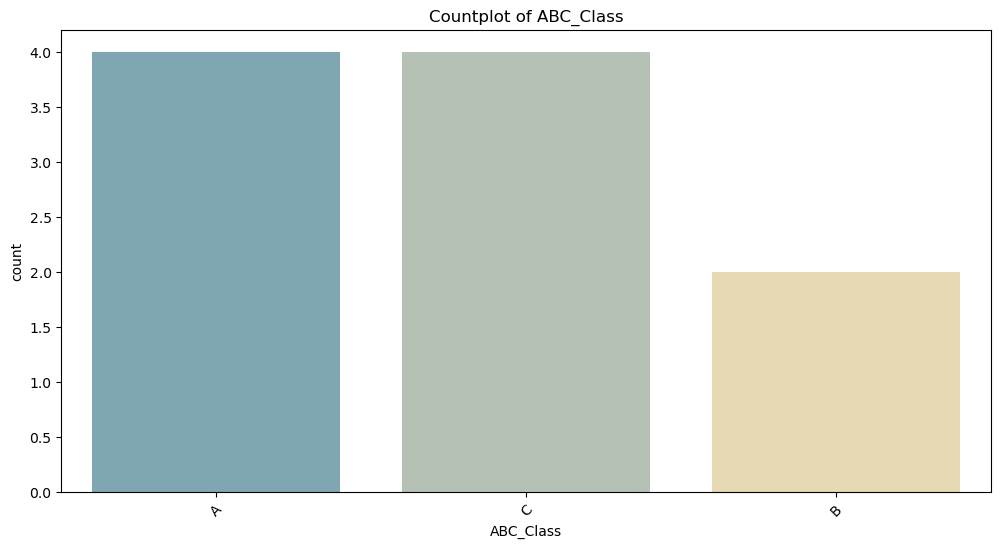

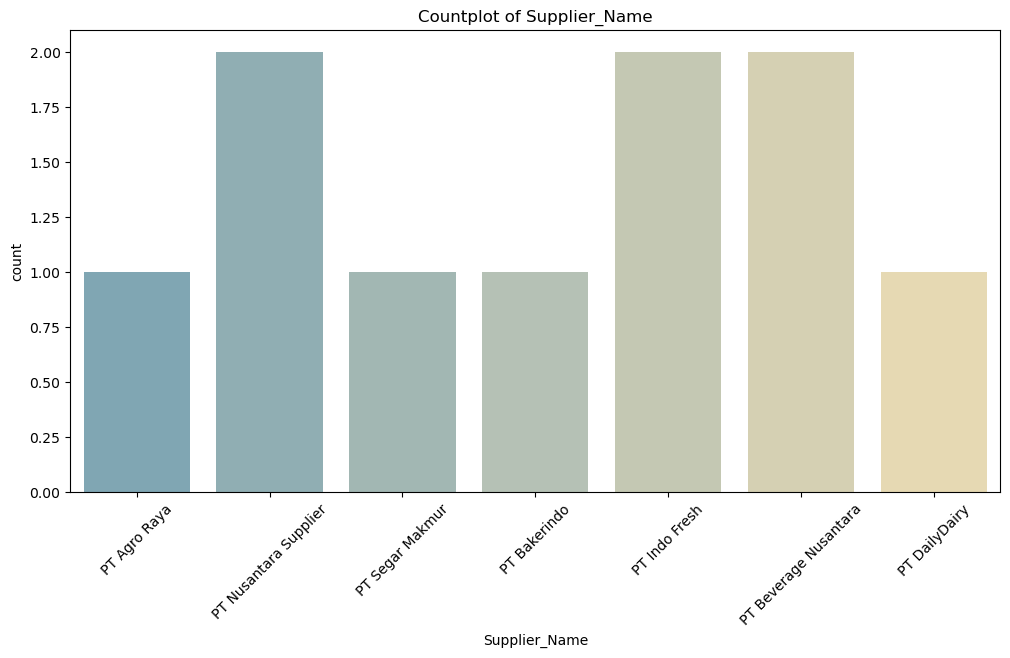

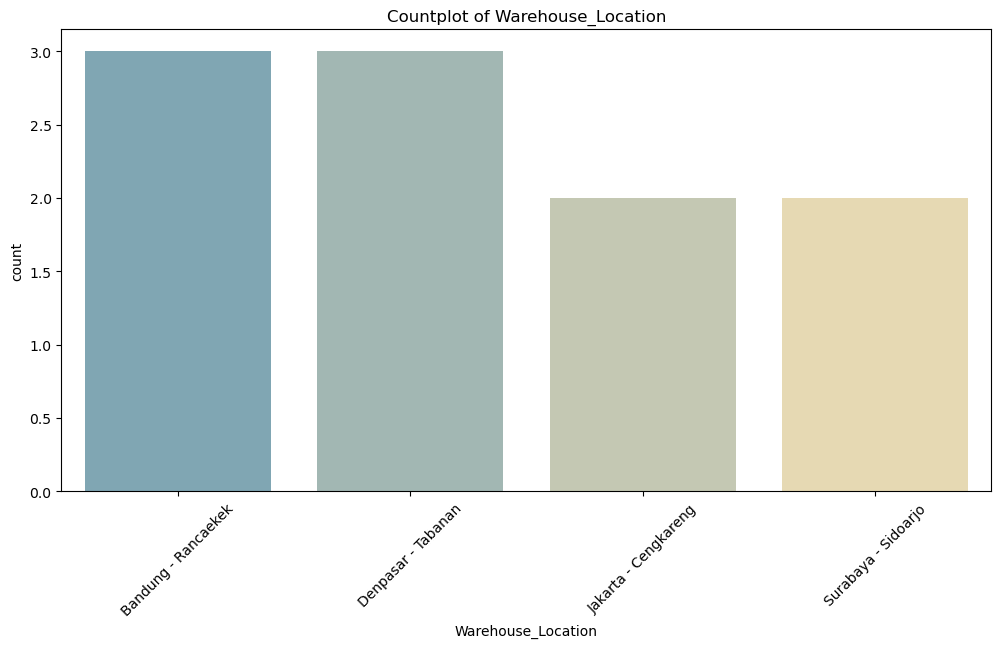

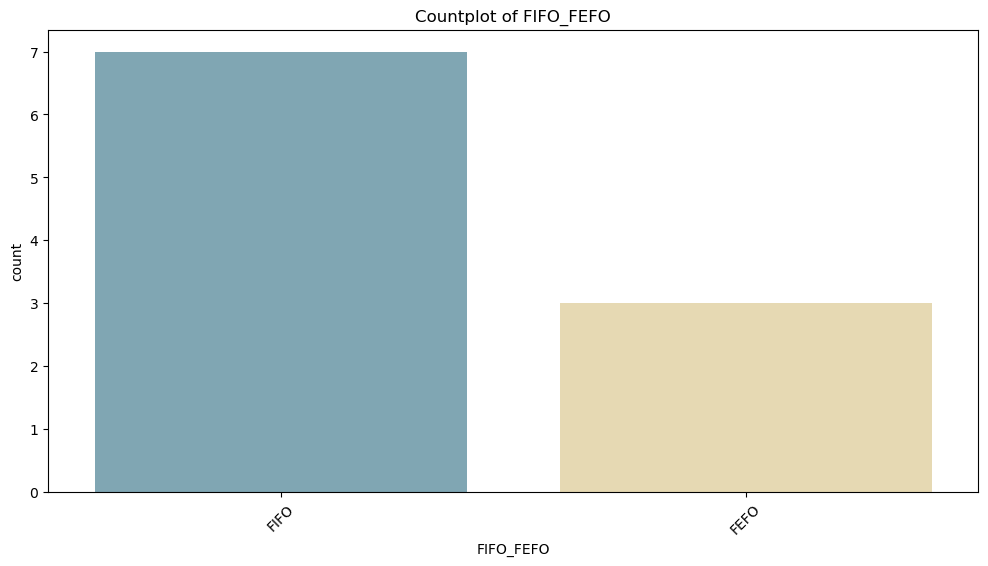

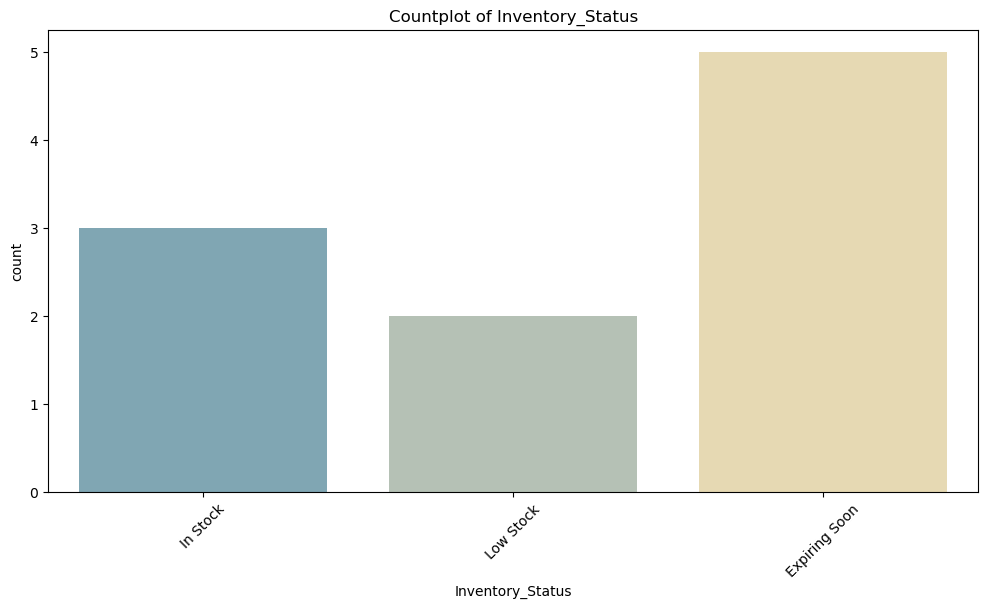

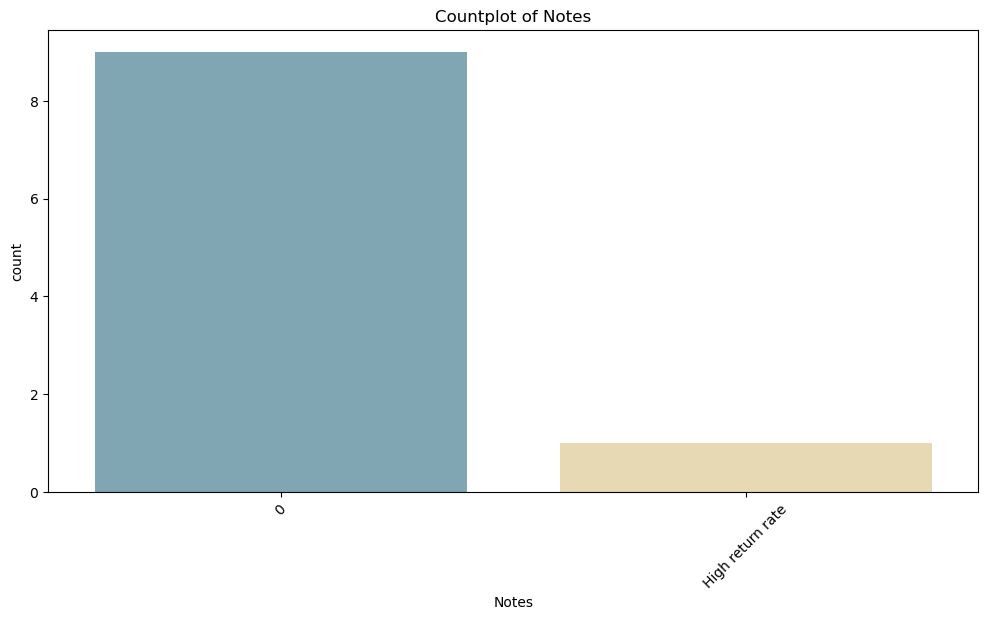

In [37]:
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df.head(10), x=col, palette='blend:#7AB,#EDA')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.tight_layout
    plt.show()

In [45]:
df.nunique()

SKU_ID                          1000
SKU_Name                         900
Category                          10
ABC_Class                          3
Supplier_ID                       10
Supplier_Name                     10
Warehouse_ID                       5
Warehouse_Location                 5
Batch_ID                         923
Received_Date                    179
Last_Purchase_Date               221
Expiry_Date                      646
Stock_Age_Days                   179
Quantity_On_Hand                 472
Quantity_Reserved                182
Quantity_Committed               152
Damaged_Qty                        8
Returns_Qty                        5
Avg_Daily_Sales                  912
Forecast_Next_30d                774
Days_of_Inventory                698
Reorder_Point                    374
Safety_Stock                     198
Lead_Time_Days                     8
Unit_Cost_USD                    700
Last_Purchase_Price_USD          710
Total_Inventory_Value_USD        996
S

### 3. Unit Cost vs Last Purchase Price USD

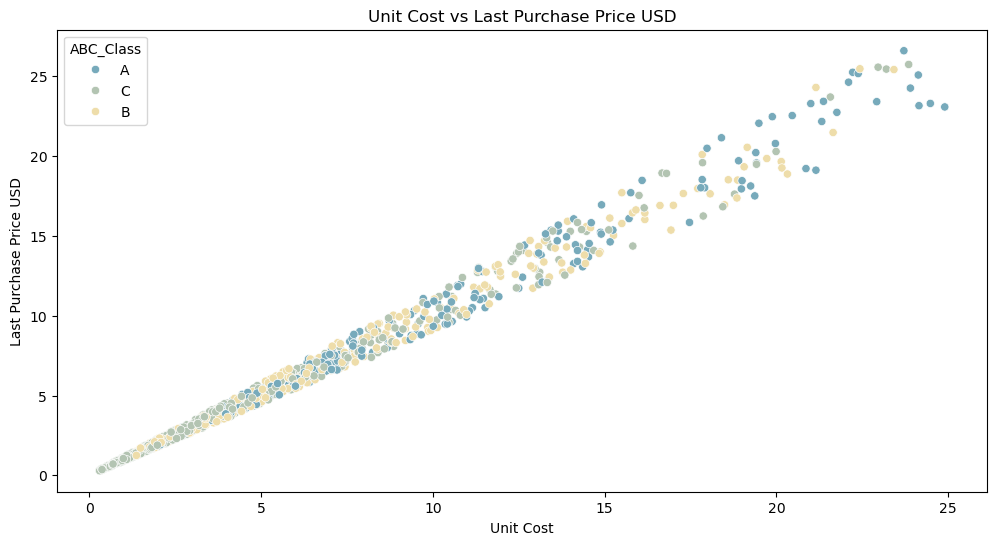

In [46]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Unit_Cost_USD'], y=df['Last_Purchase_Price_USD'], hue=df['ABC_Class'], palette='blend:#7AB,#EDA')
plt.title('Unit Cost vs Last Purchase Price USD')
plt.xlabel('Unit Cost')
plt.ylabel('Last Purchase Price USD')
plt.show()

### 4. Days Of Inventory by Expiry Date

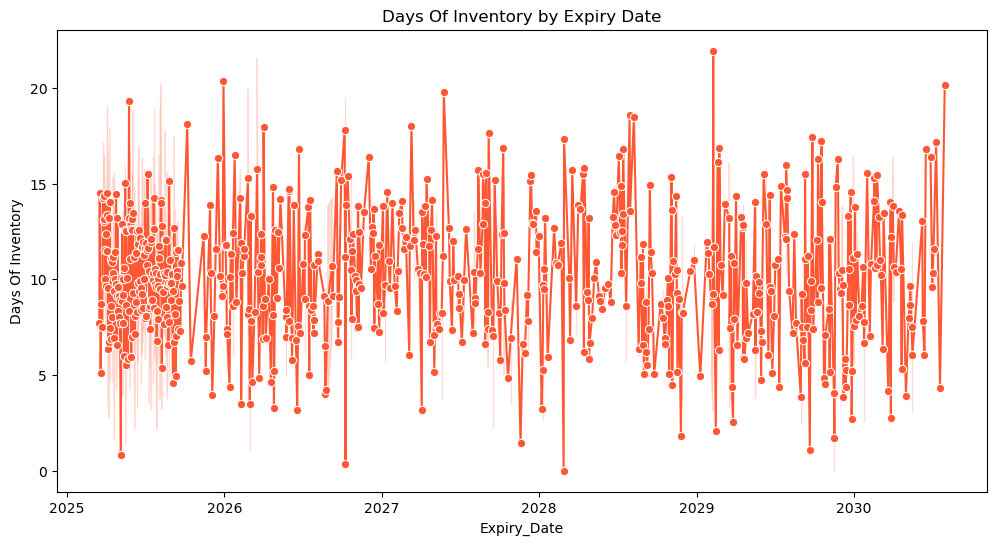

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Expiry_Date'], y=df['Days_of_Inventory'], marker='o', color='#FF5733')
plt.title('Days Of Inventory by Expiry Date')
plt.xlabel('Expiry_Date')
plt.ylabel('Days Of Inventory')
plt.show()

### 5. Average Daily Sales By Category

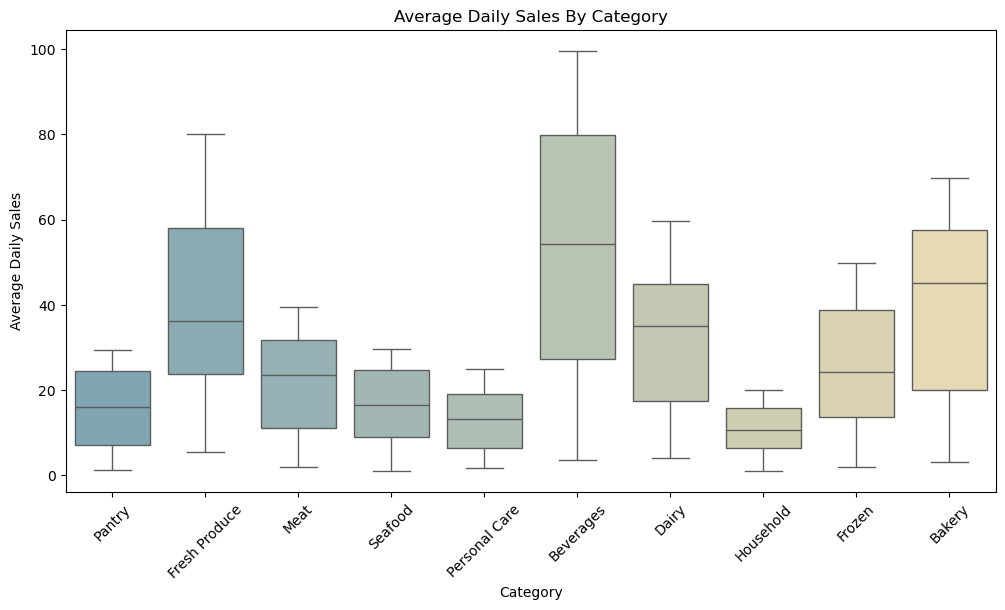

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Category'], y=df['Avg_Daily_Sales'], data=df, palette='blend:#7AB,#EDA')
plt.title('Average Daily Sales By Category')
plt.xlabel('Category')
plt.ylabel('Average Daily Sales')
plt.xticks(rotation=45)
plt.show()

### 6. Supplier Name By Inventory Status

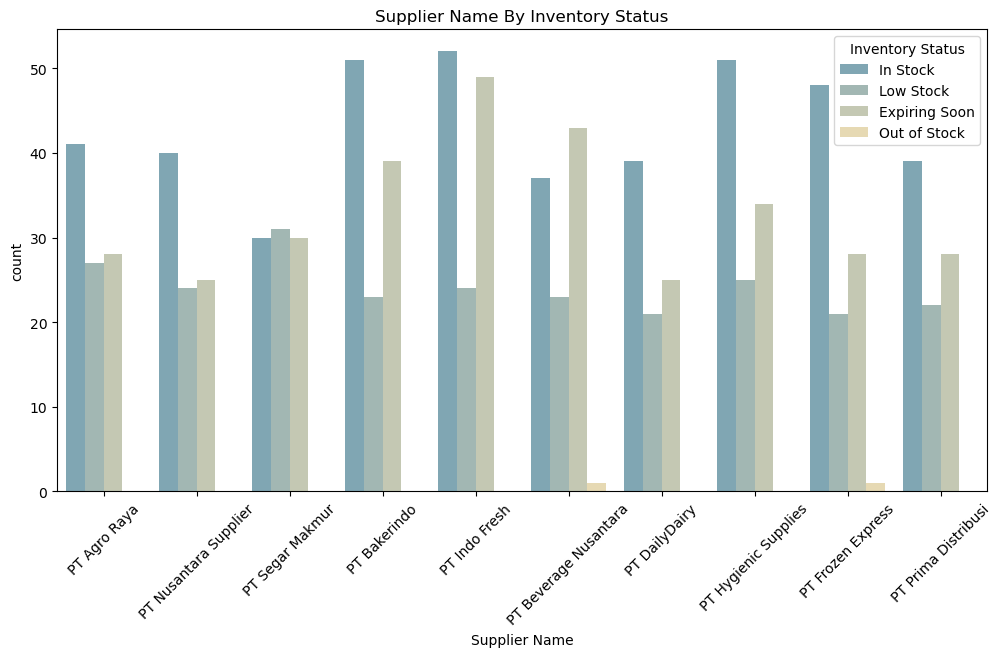

In [55]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Supplier_Name'], hue=df['Inventory_Status'], palette='blend:#7AB,#EDA')
plt.title('Supplier Name By Inventory Status')
plt.xlabel('Supplier Name')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.legend(title='Inventory Status')
plt.show()

### 7. Reorder Point By Forecast Next 30d

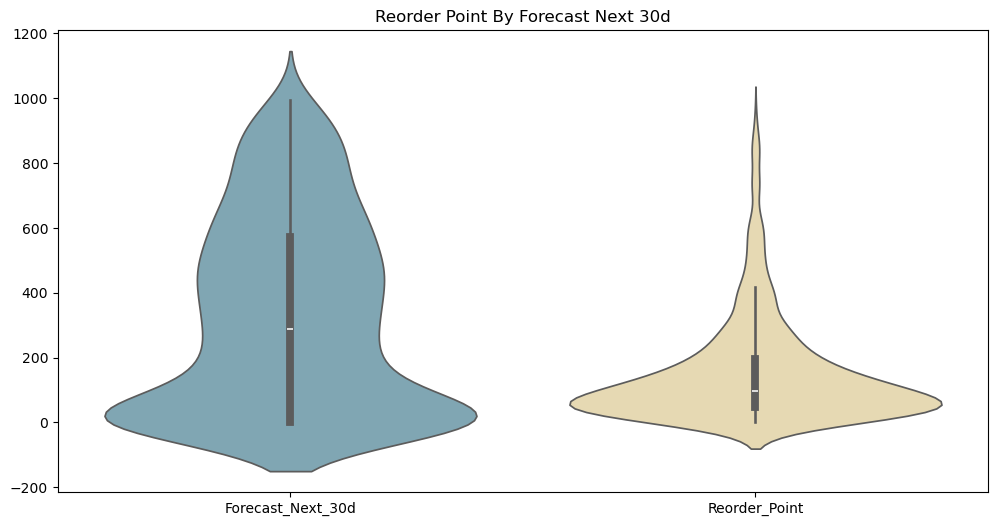

In [63]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['Forecast_Next_30d','Reorder_Point']], palette='blend:#7AB,#EDA')
plt.title('Reorder Point By Forecast Next 30d')
plt.show()

### 8. Correlation Map

In [64]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

,Stock_Age_Days,Quantity_On_Hand,Quantity_Reserved,Quantity_Committed,Damaged_Qty,Returns_Qty,Avg_Daily_Sales,Forecast_Next_30d,Days_of_Inventory,Reorder_Point,Safety_Stock,Lead_Time_Days,Unit_Cost_USD,Last_Purchase_Price_USD,SKU_Churn_Rate,Order_Frequency_per_month,Count_Variance
0,57,359,100,36,0,0,28.57,971.000,12.57,51.0,22,1,5.81,5.71,2.39,5.0,0
1,154,314,64,0,0,1,34.99,796.000,8.97,744.0,254,14,1.45,1.33,3.34,12.0,4
2,178,485,28,62,3,1,36.55,1.377,13.27,225.0,79,4,1.86,1.69,2.26,11.0,-5
3,91,281,92,49,0,0,25.49,716.000,11.02,162.0,60,4,14.50,14.12,2.72,10.0,0
4,75,235,63,33,0,2,17.05,518.000,13.78,80.0,29,3,9.46,10.31,2.18,2.0,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,51,382,64,48,1,0,31.90,678.000,11.97,485.0,166,10,0.99,1.05,2.51,8.0,2
996,177,208,27,96,0,1,40.03,1.019,5.20,307.0,107,5,2.54,2.31,5.77,15.0,0
997,0,264,48,13,1,2,26.13,797.000,10.10,394.0,133,10,0.69,0.71,2.97,9.0,0
998,125,33,33,0,2,2,23.48,676.000,1.41,181.0,64,5,2.38,2.71,21.35,13.0,0


In [65]:
correlation = numeric_df.corr()

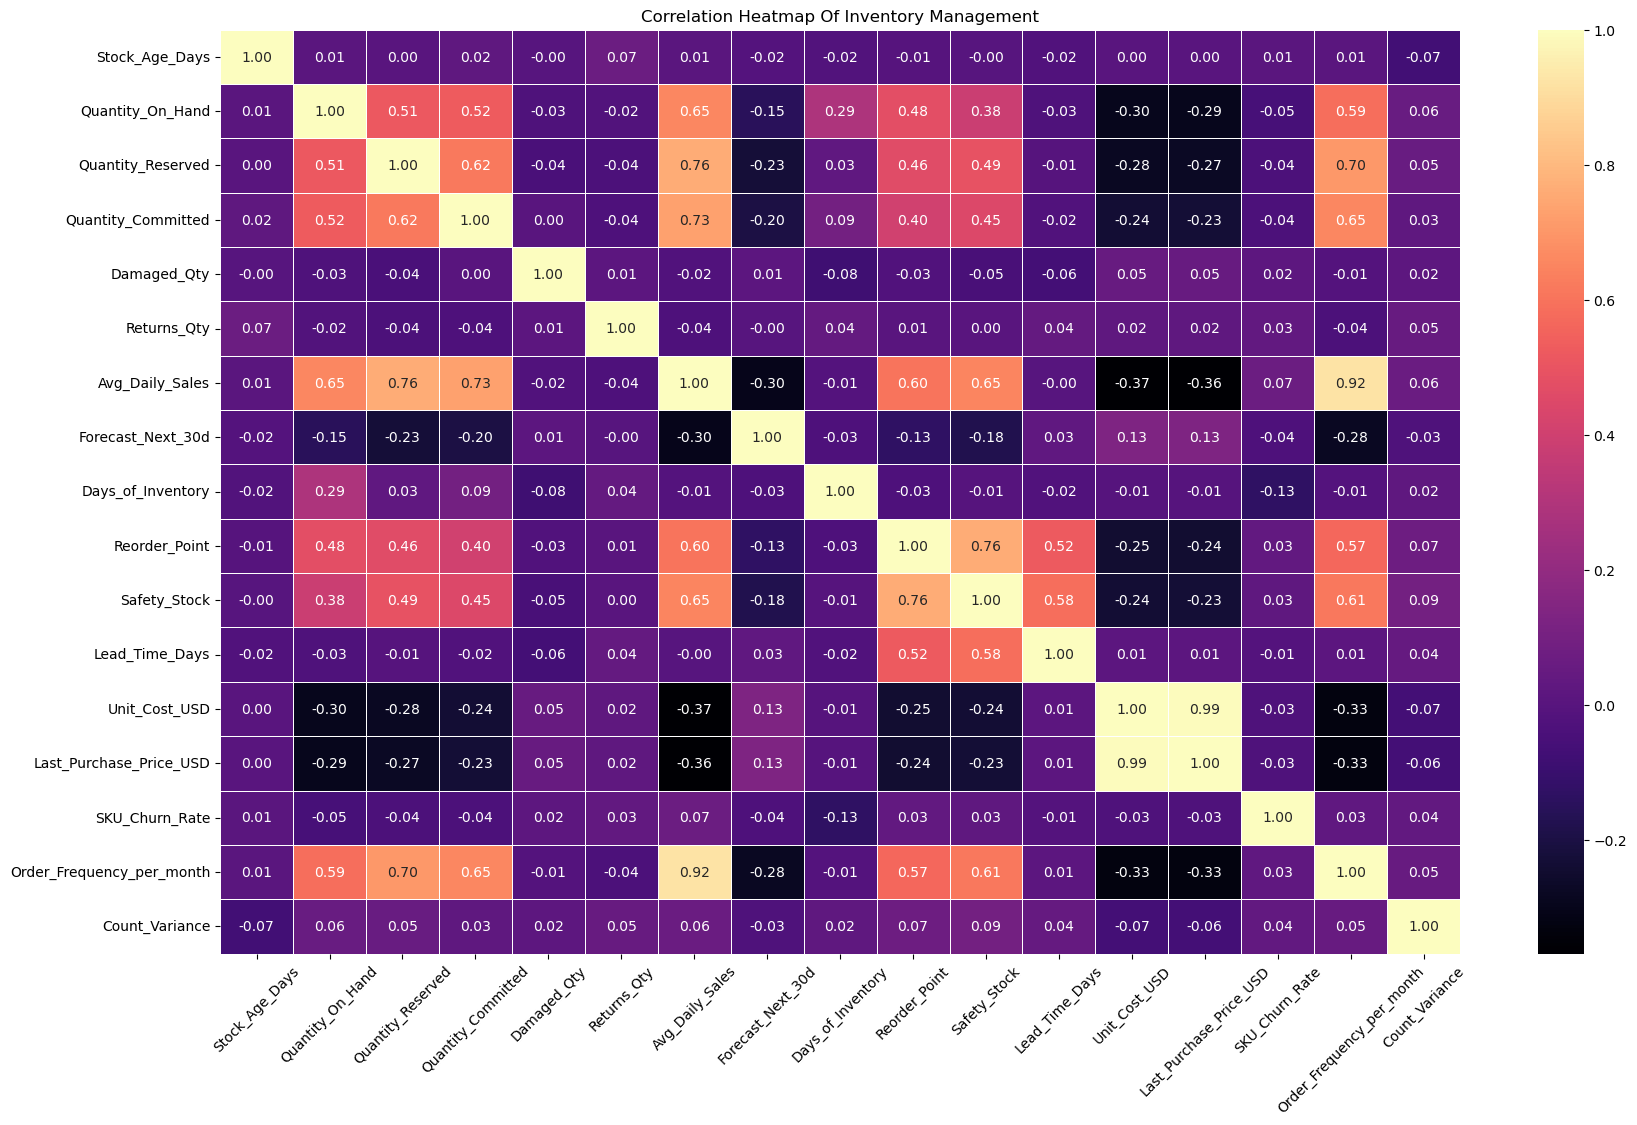

In [66]:
plt.figure(figsize=(20, 12))
sns.heatmap(correlation, annot=True, cmap='magma', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap Of Inventory Management')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Predictive Modeling

### 1. Train Test Split

In [71]:
features = ['Stock_Age_Days', 'Quantity_On_Hand', 'Quantity_Reserved', 'Quantity_Committed', 'Damaged_Qty', 'Returns_Qty','Avg_Daily_Sales', 'Forecast_Next_30d', 'Days_of_Inventory', 'Safety_Stock', 'Lead_Time_Days', 'Unit_Cost_USD', 
            'Last_Purchase_Price_USD','Order_Frequency_per_month', 'Count_Variance']
target = 'SKU_Churn_Rate'

X = df[features]
y = df[target]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(800, 15) (200, 15)
